# auto_annot_Martin2019_with_Smillie2019_dblabel_l2

In [1]:
import besca as bc
import scanpy as sc
import pkg_resources
import os

### Specify folders where .h5ad files are found and their names. 

The datasets that are already annotated and should be used for training. If you only use one dataset please use list of one.

In [2]:
adata_trains = [sc.read(pkg_resources.resource_filename('besca', 'datasets/data/Smillie2019_processed.h5ad'))]

The dataset of interest that should be annotated.

In [3]:
adata_pred = bc.datasets.Martin2019_processed()
adata_orig = bc.datasets.Martin2019_processed()

Define level of dblabel reference annotation

In [4]:
level = 2

Give your analysis a name.

In [5]:
analysis_name = 'auto_annot_Martin2019_with_Smillie2019_dblabel_l' + str(level)

### Now specify parameters

Specify column name of celltype annotation you want to train on.

In [6]:
celltype_train ='dblabel_l' + str(level)
celltype_test = 'dblabel_l' + str(level)

Choose a method:

- linear: Support Vector Machine with Linear Kernel
- sgd: Support Vector Machine with Linear Kernel using Stochastic Gradient Descent
- rbf: Support Vector Machine with radial basis function kernel. Very time intensive, use only on small datasets.
- logistic_regression: Standard logistic classifier iwth multinomial loss.
- logistic_regression_ovr: Logistic Regression with one versus rest classification.
- logistic_regression_elastic: Logistic Regression with elastic loss, cross validates among multiple l1 ratios.

In [7]:
method = 'logistic_regression'

Specify merge method if using multiple training datasets. Needs to be either scanorama or naive.

In [8]:
merge = 'scanorama'

Decide if you want to use the raw format or highly variable genes. Raw increases computational time and does not necessarily improve predictions.

In [9]:
use_raw = False

You can choose to only consider a subset of genes from a signature set.

In [10]:
genes_to_use = 'all'

### Translate cell type annoation to lower dblabel level

In [11]:
new_cnames = bc.tl.sig.obtain_new_label(
    nomenclature_file=pkg_resources.resource_filename('besca', 'datasets/nomenclature/CellTypes_v1.tsv'), 
    cnames=list(adata_trains[0].obs['dblabel'].cat.categories), 
    reference_label='dblabel', 
    new_label='dblabel', 
    new_level=level)

new_cnames

new_label
CD1c-positive myeloid dendritic cell                                myeloid leukocyte
CD4-positive, alpha-beta memory T cell                                     lymphocyte
CD8-positive, alpha-beta T cell                                            lymphocyte
CD8-positive, alpha-beta cytokine secreting eff...                         lymphocyte
CD141-positive myeloid dendritic cell                               myeloid leukocyte
HEV endothelial cell                                endothelial cell of vascular tree
activated CD4-positive, alpha-beta T cell                                  lymphocyte
brush cell                                                       endo-epithelial cell
endothelial cell                                                     endothelial cell
enterocyte                                                       endo-epithelial cell
enterocyte progenitor                                            endo-epithelial cell
enteroendocrine cell                                        glandular epithelial cell
exhausted-like CD4-positive, alpha-beta T cell                             lymphocyte
fibroblast                                                                 fibroblast
follicular B cell                                             lymphocyte of B lineage
germinal center B cell                                        lymphocyte of B lineage
glial cell                                                                 glial cell
goblet cell                                                 glandular epithelial cell
immature enterocyte                                              endo-epithelial cell
immature goblet cell                                        glandular epithelial cell
inflammatory fibroblast                                                    fibroblast
inflammatory monocyte                                               myeloid leukocyte
innate lymphoid cell                                                       lymphocyte
macrophage                                                          myeloid leukocyte
mast cell                                                           myeloid leukocyte
microfold cell                                                   endo-epithelial cell
microvascular endothelial cell                      endothelial cell of vascular tree
myofibroblast cell                                                 myofibroblast cell
natural killer cell                                                        lymphocyte
pericyte cell                                                           pericyte cell
plasma cell                                                   lymphocyte of B lineage
proliferating B cell                                          lymphocyte of B lineage
proliferating T cell                                                       lymphocyte
proliferating monocyte                                              myeloid leukocyte
proliferating transit amplifying cell                            endo-epithelial cell
regulatory T cell                                                          lymphocyte
stem cell                                                                   stem cell
transit amplifying cell                                          endo-epithelial cell

In [12]:
adata_trains[0].obs['dblabel_l' + str(level)] = bc.tl.sig.add_anno(adata_trains[0], new_cnames, 'new_label', 'dblabel')

In [13]:
new_cnames = bc.tl.sig.obtain_new_label(
    nomenclature_file=pkg_resources.resource_filename('besca', 'datasets/nomenclature/CellTypes_v1.tsv'), 
    cnames=list(adata_pred.obs['dblabel'].cat.categories), 
    reference_label='dblabel', 
    new_label='dblabel', 
    new_level=level)

new_cnames

new_label
CD4-positive, alpha-beta memory T cell                            lymphocyte
CD8-positive, alpha-beta cytotoxic T cell                         lymphocyte
CD8-positive, alpha-beta memory T cell                            lymphocyte
HEV endothelial cell                       endothelial cell of vascular tree
IgG plasma cell                                      lymphocyte of B lineage
IgM or IgA plasma cell                               lymphocyte of B lineage
blood vessel endothelial cell              endothelial cell of vascular tree
fibroblast                                                        fibroblast
group 1 innate lymphoid cell                                      lymphocyte
group 3 innate lymphoid cell                                      lymphocyte
intestinal epithelial cell                              endo-epithelial cell
memory B cell                                        lymphocyte of B lineage
memory T cell                                                     lymphocyte
myeloid dendritic cell                                     myeloid leukocyte
myeloid leukocyte                                          myeloid leukocyte
naive B cell                                         lymphocyte of B lineage
naive T cell                                                      lymphocyte
neural cell                                                      neural cell
pericyte cell                                                  pericyte cell
plasmacytoid dendritic cell                                       lymphocyte
proliferating T cell                                              lymphocyte
regulatory T cell                                                 lymphocyte

In [14]:
adata_pred.obs['dblabel_l' + str(level)] = bc.tl.sig.add_anno(adata_pred, new_cnames, 'new_label', 'dblabel')
adata_orig.obs['dblabel_l' + str(level)] = adata_pred.obs['dblabel_l' + str(level)] 

### Merge all training and the testing set.

This function merges training datasets, removes unwanted genes, and if scanorama is used corrects for datasets.

In [15]:
adata_train, adata_pred = bc.tl.auto_annot.merge_data(adata_trains, adata_pred, genes_to_use = genes_to_use, merge = merge)

merging with scanorama
[[0.         0.55297257]
 [0.         0.        ]]
Processing datasets (0, 1)
integrating training set
calculating intersection


### Train the classifier.

The returned scaler is fitted on the training dataset (to zero mean and scaled to unit variance).

In [16]:
classifier, scaler = bc.tl.auto_annot.fit(adata_train, method, celltype_train)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed: 41.1min finished


### Prediction

Use fitted model to predict celltypes in adata_pred. Prediction will be added in a new column called 'auto_annot'. Paths are needed as adata_pred will revert to its original state (all genes, no additional corrections).
The threshold should be set to 0 or left out for SVM. For logisitic regression the threshold can be set.

In [17]:
adata_predicted = bc.tl.auto_annot.adata_predict(classifier = classifier, scaler = scaler, adata_pred = adata_pred, adata_orig = adata_orig, threshold = 0)

Write out metrics to a report file, create confusion matrices and comparative umap plots

acc: 0.89
f1: 0.9
ami: 0.75
ari: 0.77
silhouette dblabel_l2: 0.32
silhouette auto_annot: 0.11
pair confusion matrix:
            0           1
0  2327989860   119844072
1   287748096  1133444574


... storing 'auto_annot' as categorical


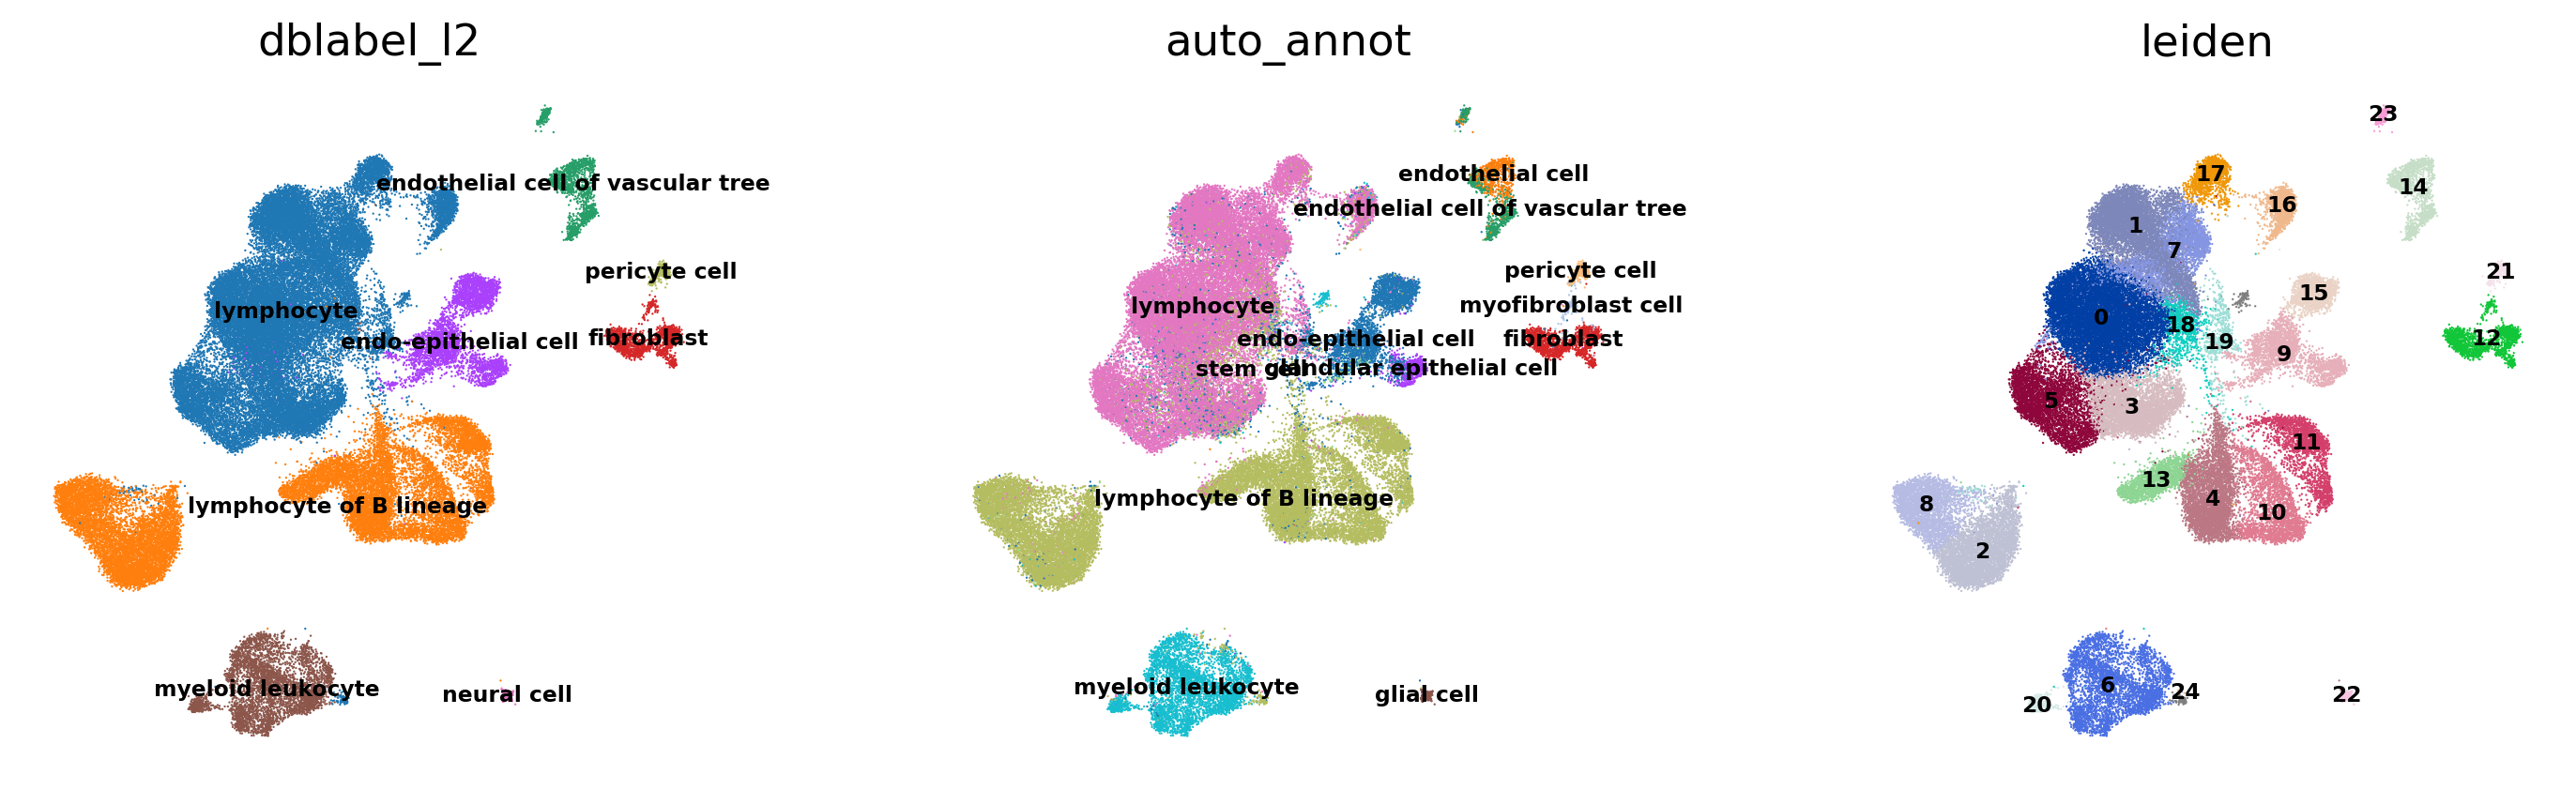

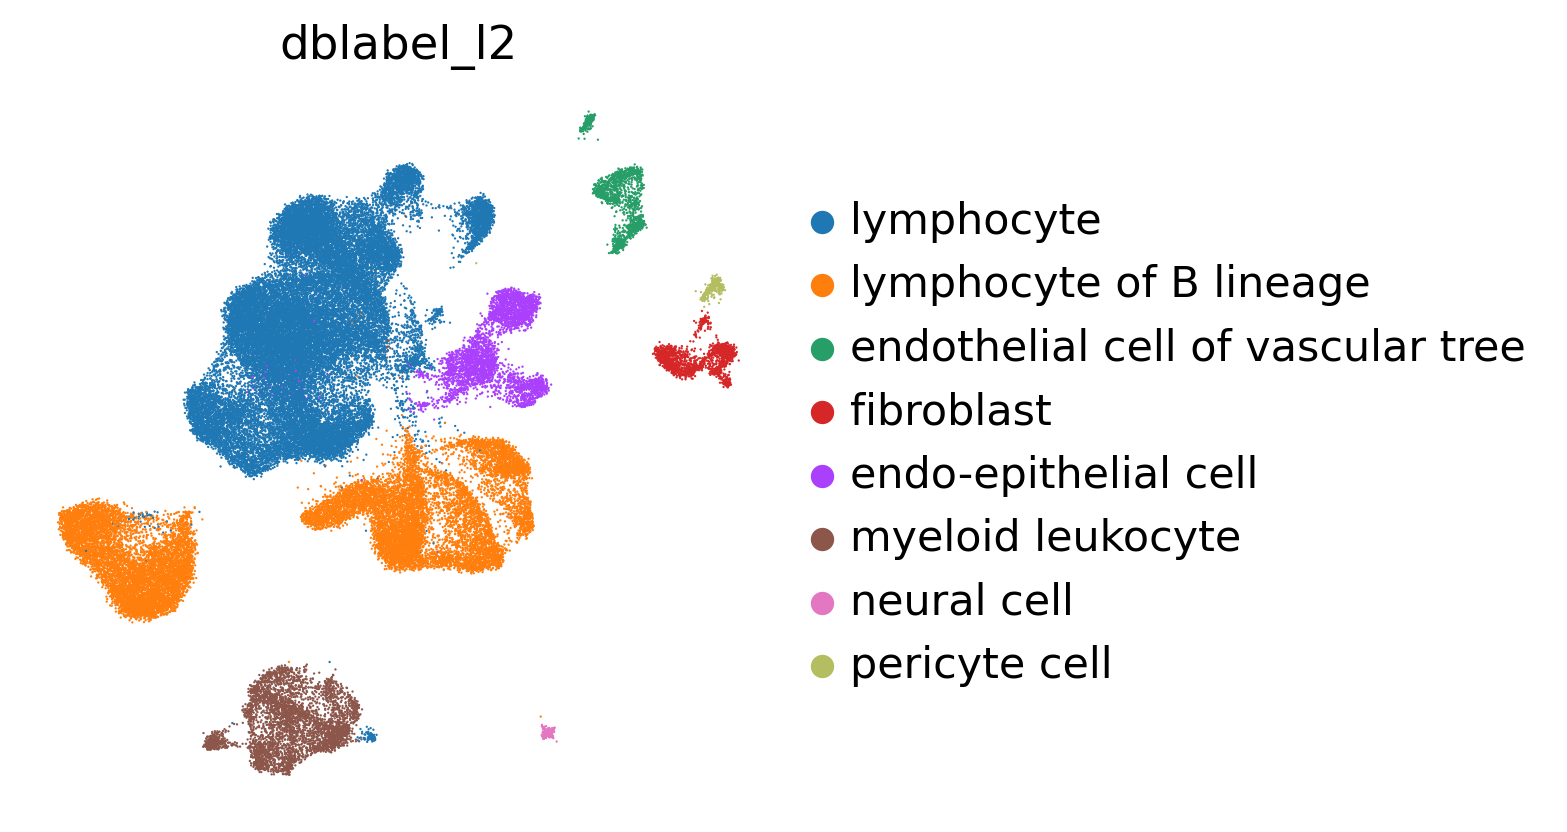

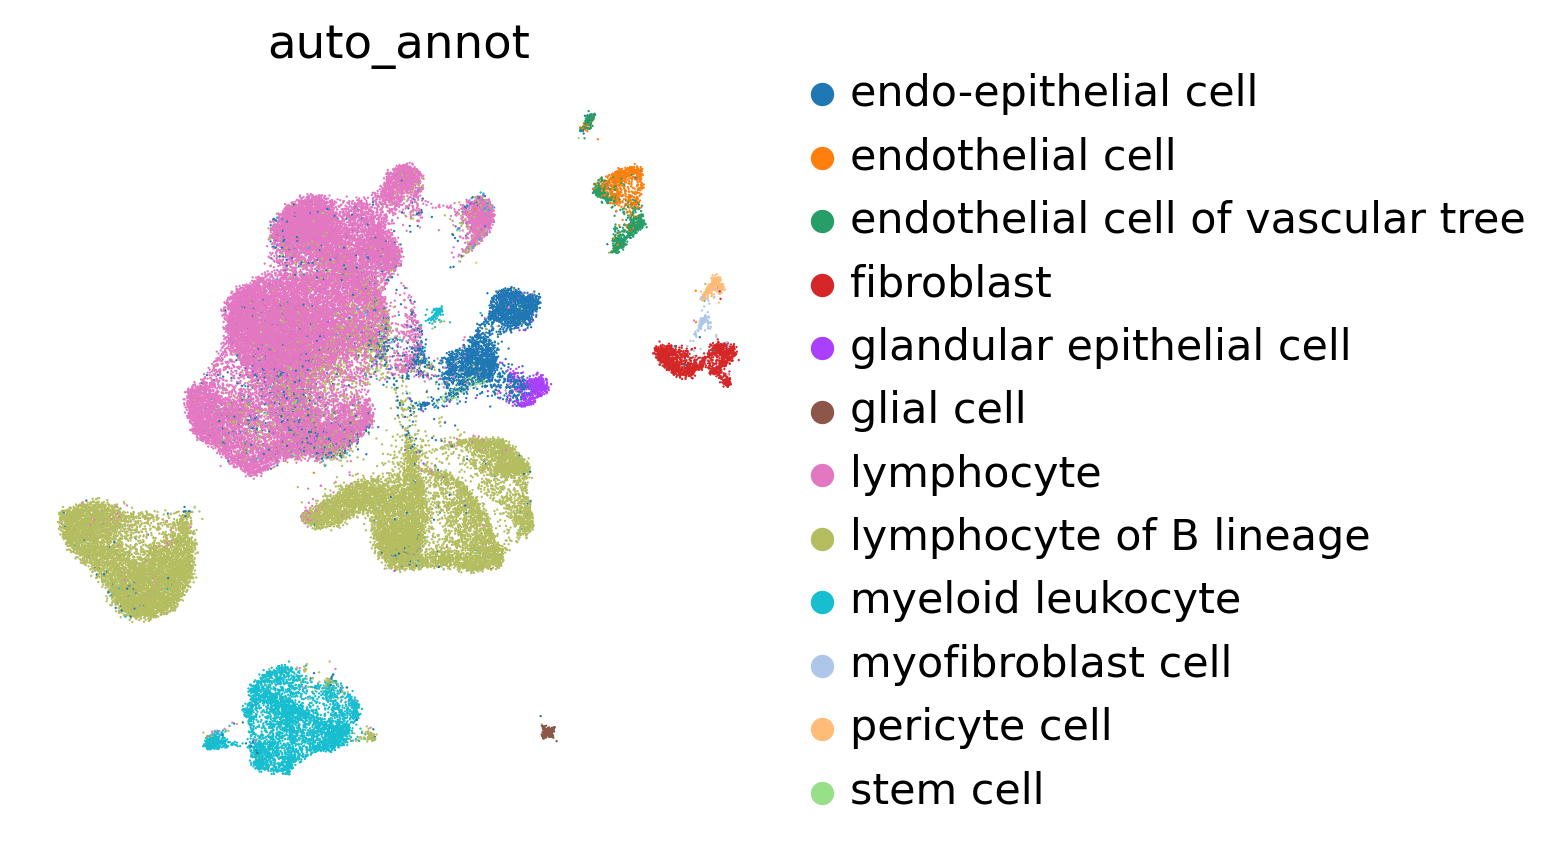

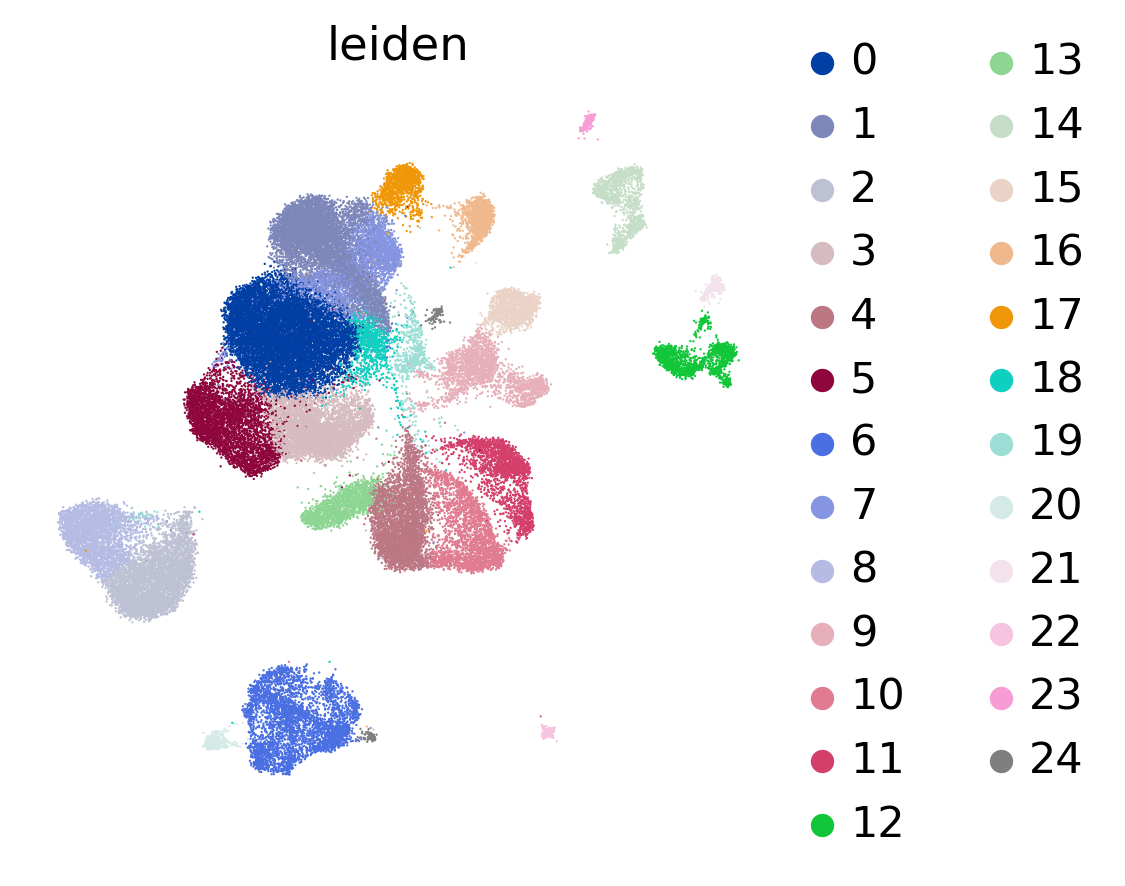

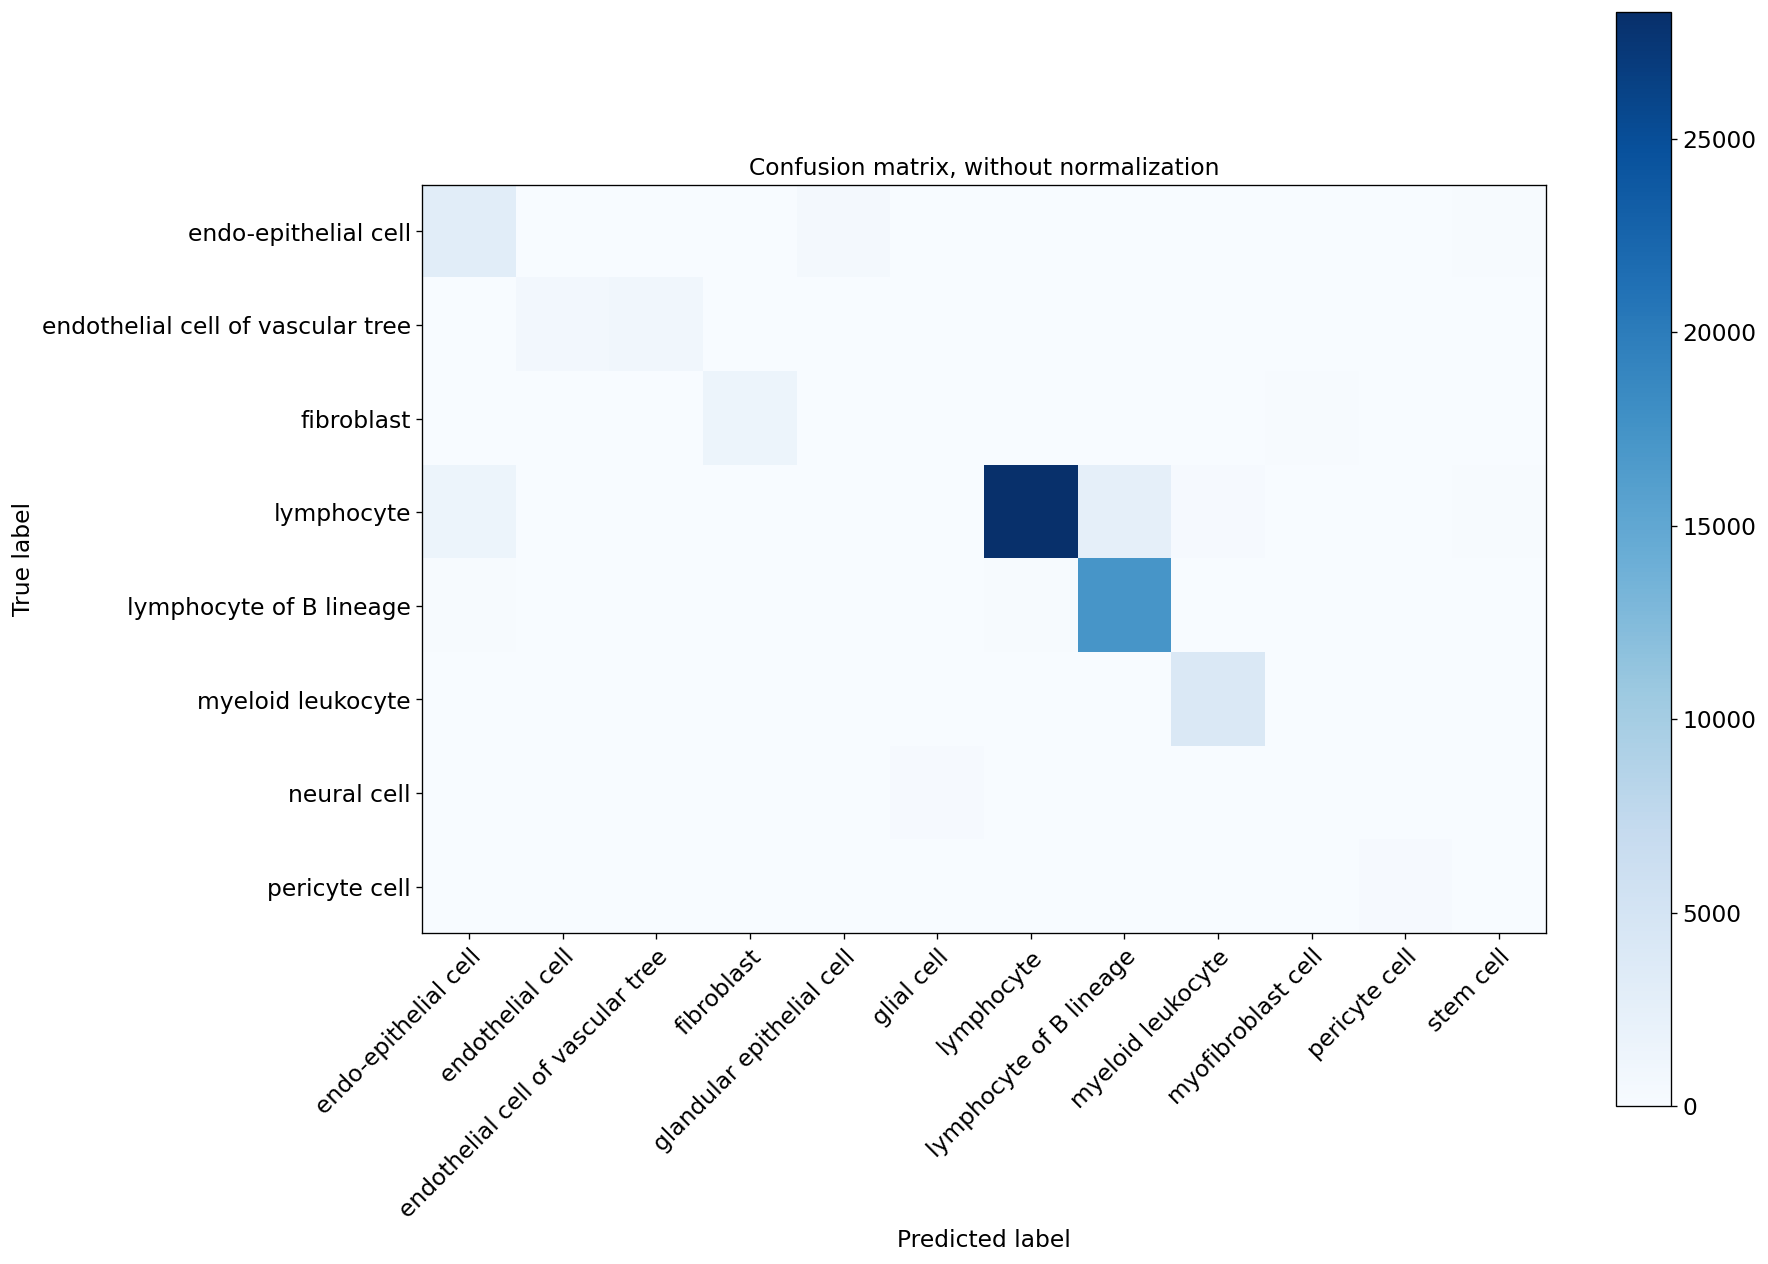

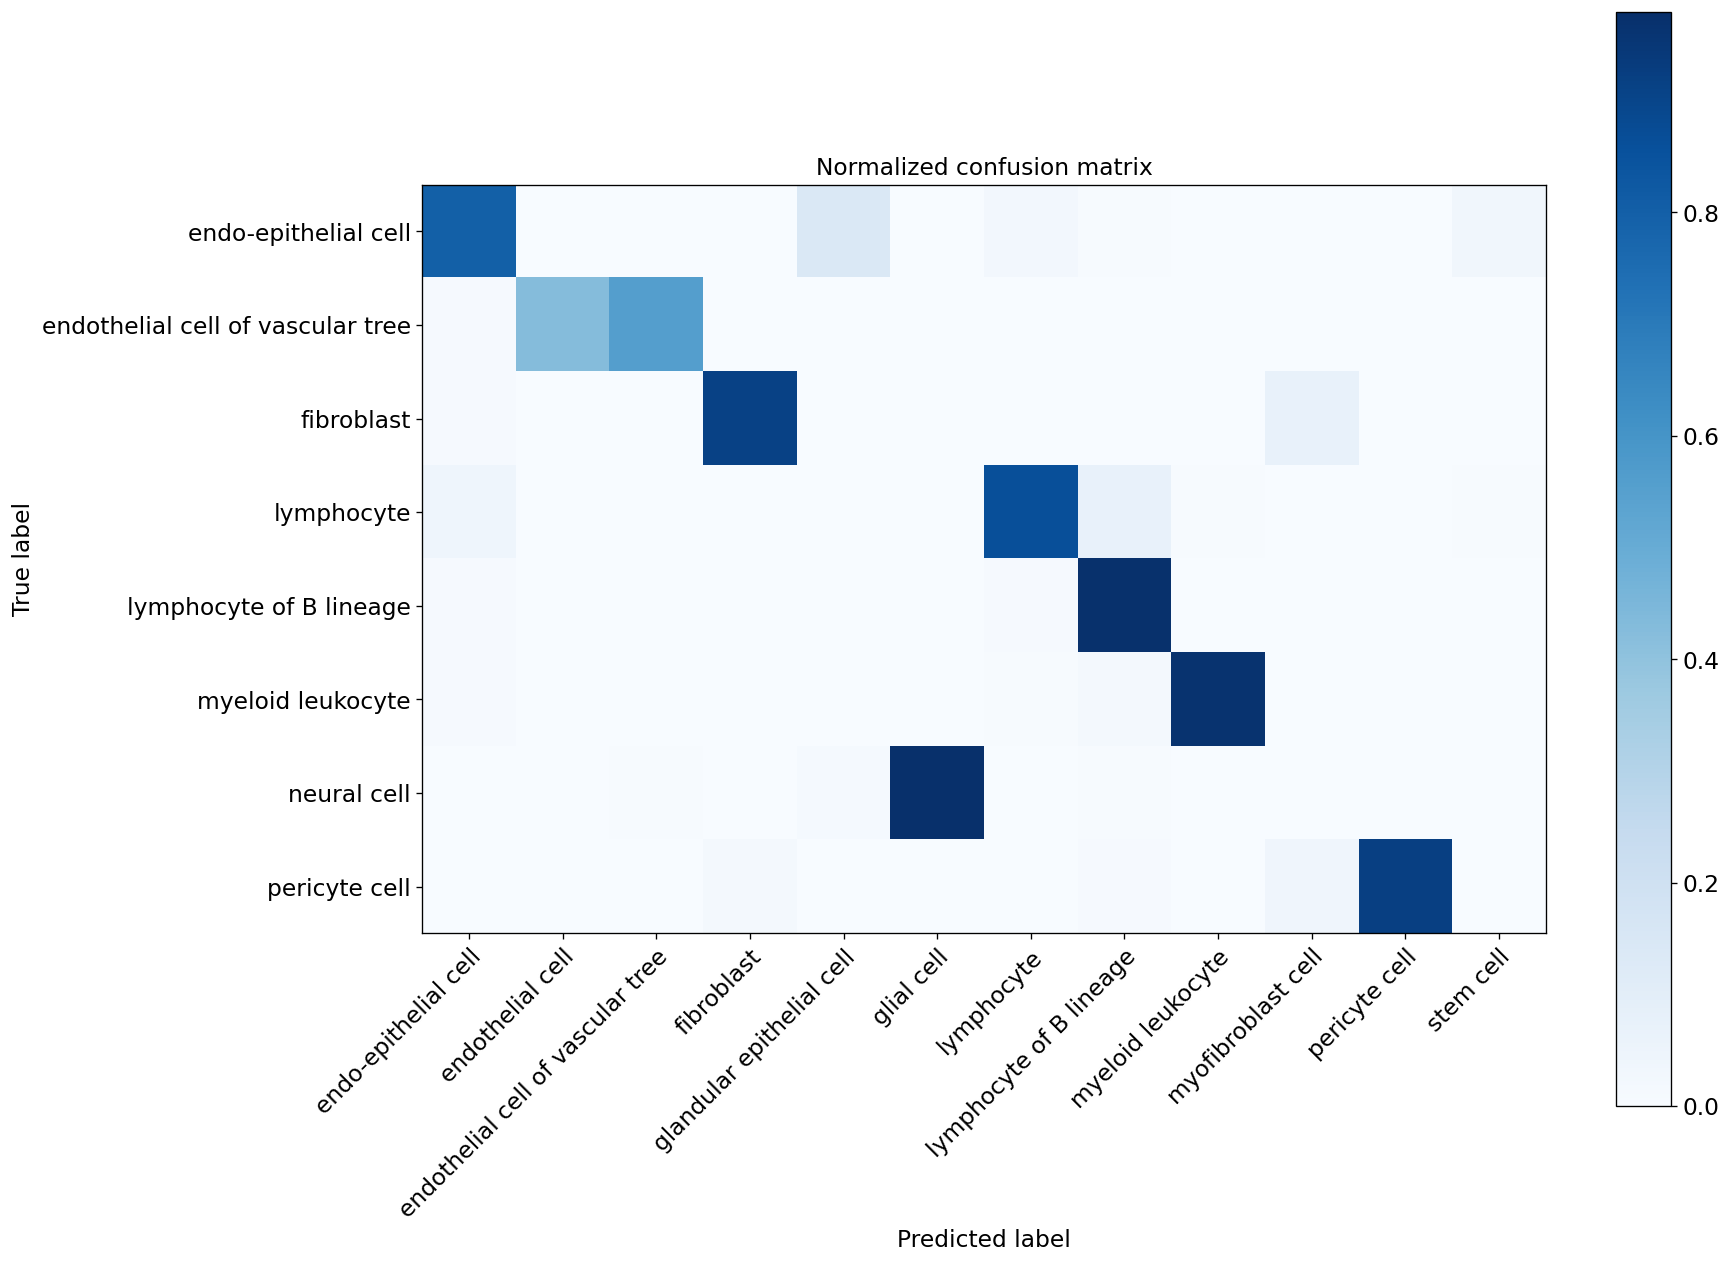

In [18]:
%matplotlib inline

bc.tl.report(
    adata_pred=adata_predicted,
    celltype=celltype_test, 
    method=method, 
    analysis_name=analysis_name,
    train_datasets = adata_trains,
    test_dataset = adata_orig,
    merge = merge,
    name_prediction='auto_annot', 
    name_report='auto_annot', 
    use_raw=use_raw,
    remove_nonshared=True, 
    clustering='leiden', 
    asymmetric_matrix=True, 
    delimiter='\t', 
    verbose=True
)

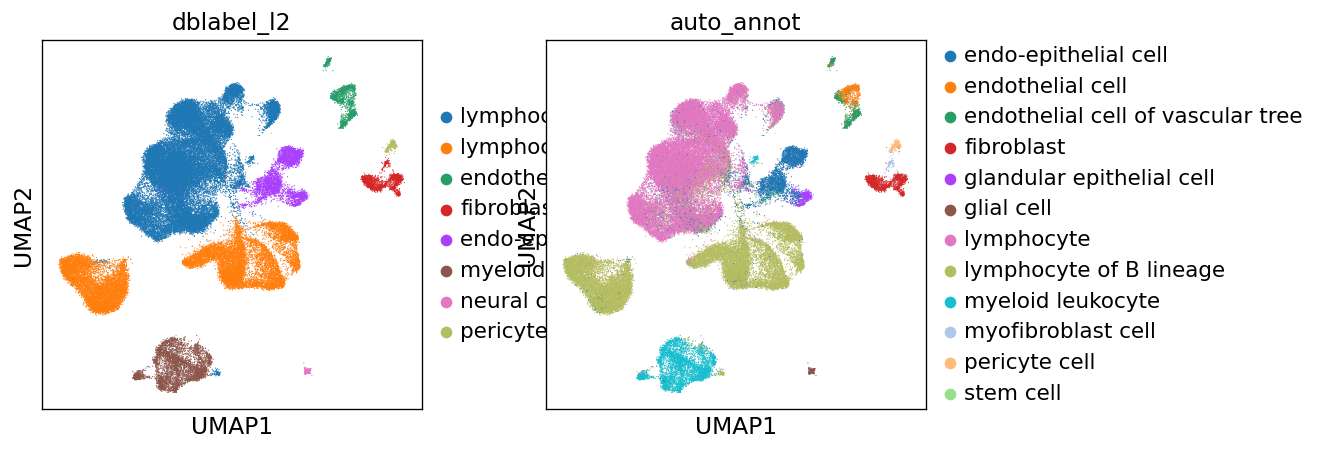

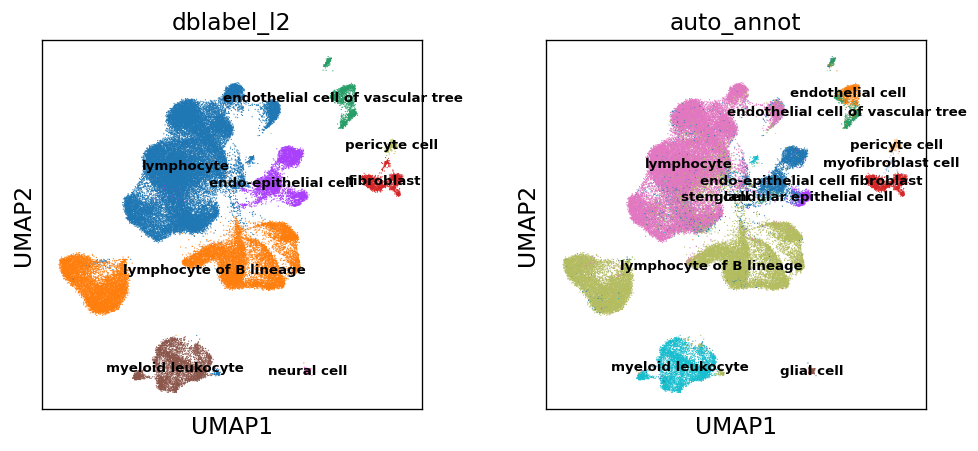

In [19]:
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'])
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'], legend_loc='on data', legend_fontsize=8)

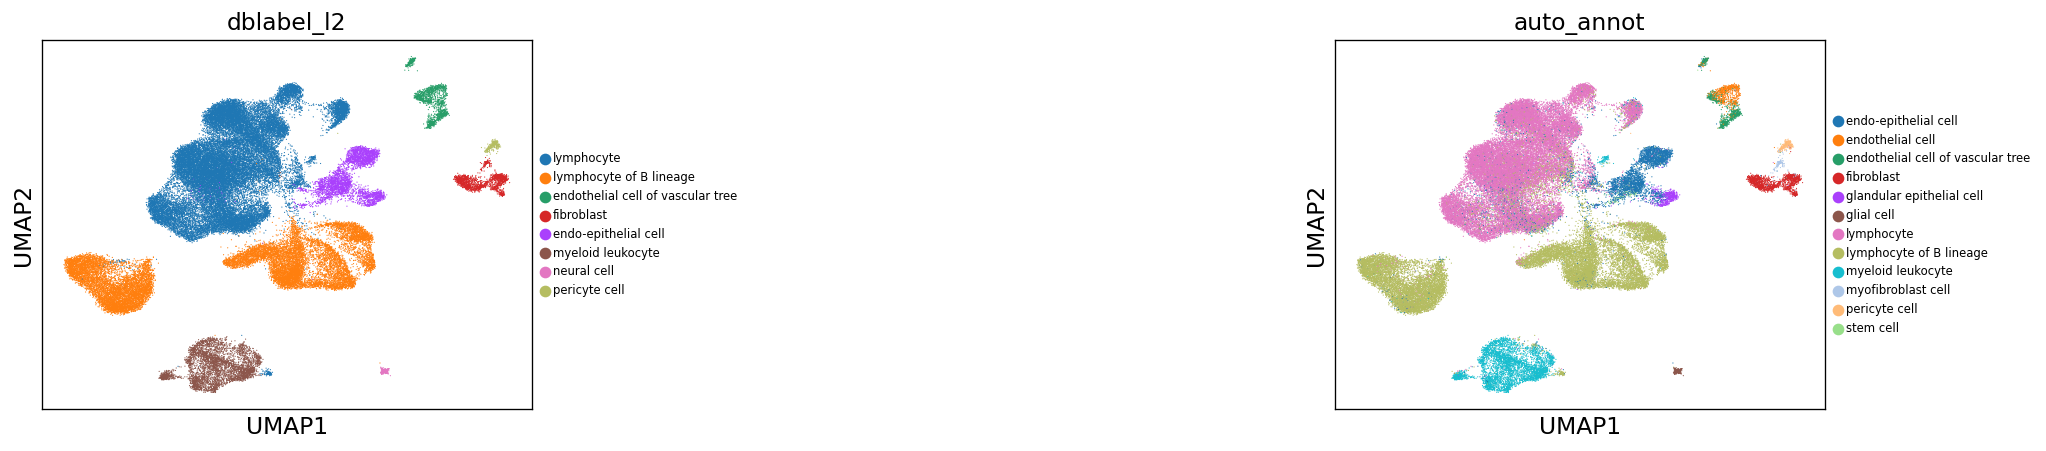

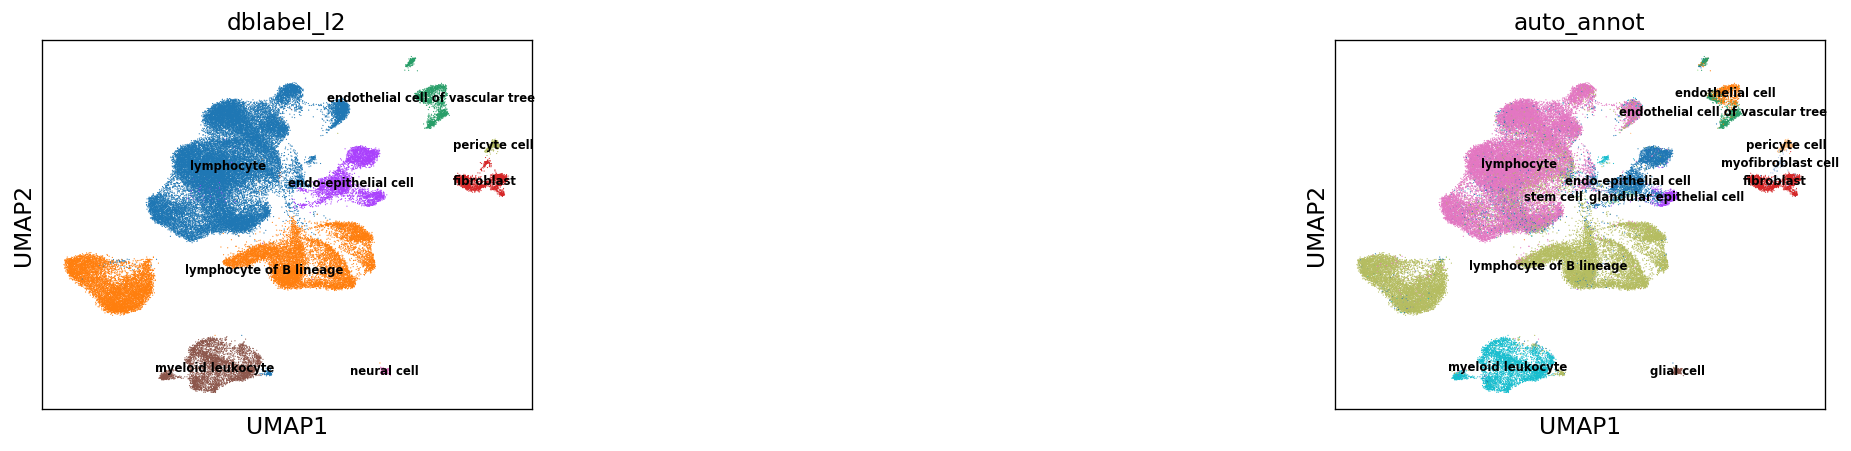

In [20]:
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'], legend_fontsize=7, wspace = 1.4, save = '.svg')
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'], legend_loc='on data', legend_fontsize=7, wspace = 1.4, save = '.ondata.svg')

In [21]:
adata_train

View of AnnData object with n_obs × n_vars = 149732 × 1054
    obs: 'CELL', 'Cluster', 'Health', 'Location', 'Subject', 'celltype_highlevel', 'nGene', 'nUMI', 'original_name', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'leiden', 'dblabel', 'celltype', 'cluster_celltype', 'Type', 'dblabel_l2'
    var: 'SYMBOL', 'ENSEMBL-0', 'n_cells-0', 'total_counts-0', 'frac_reads-0', 'ENSEMBL-1', 'n_cells-1', 'total_counts-1', 'frac_reads-1'
    uns: 'Cluster_colors', 'Location_colors', 'Type_colors', 'celltype_highlevel_colors', 'leiden', 'leiden_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_scanorama'

acc: 0.36
f1: 0.36
ami: -0.0
ari: -0.0
silhouette dblabel_l2: 0.32
silhouette random_labeling: -0.04
pair confusion matrix:
            0          1
0  1548330116  899503816
1   899503816  521688854


... storing 'random_labeling' as categorical


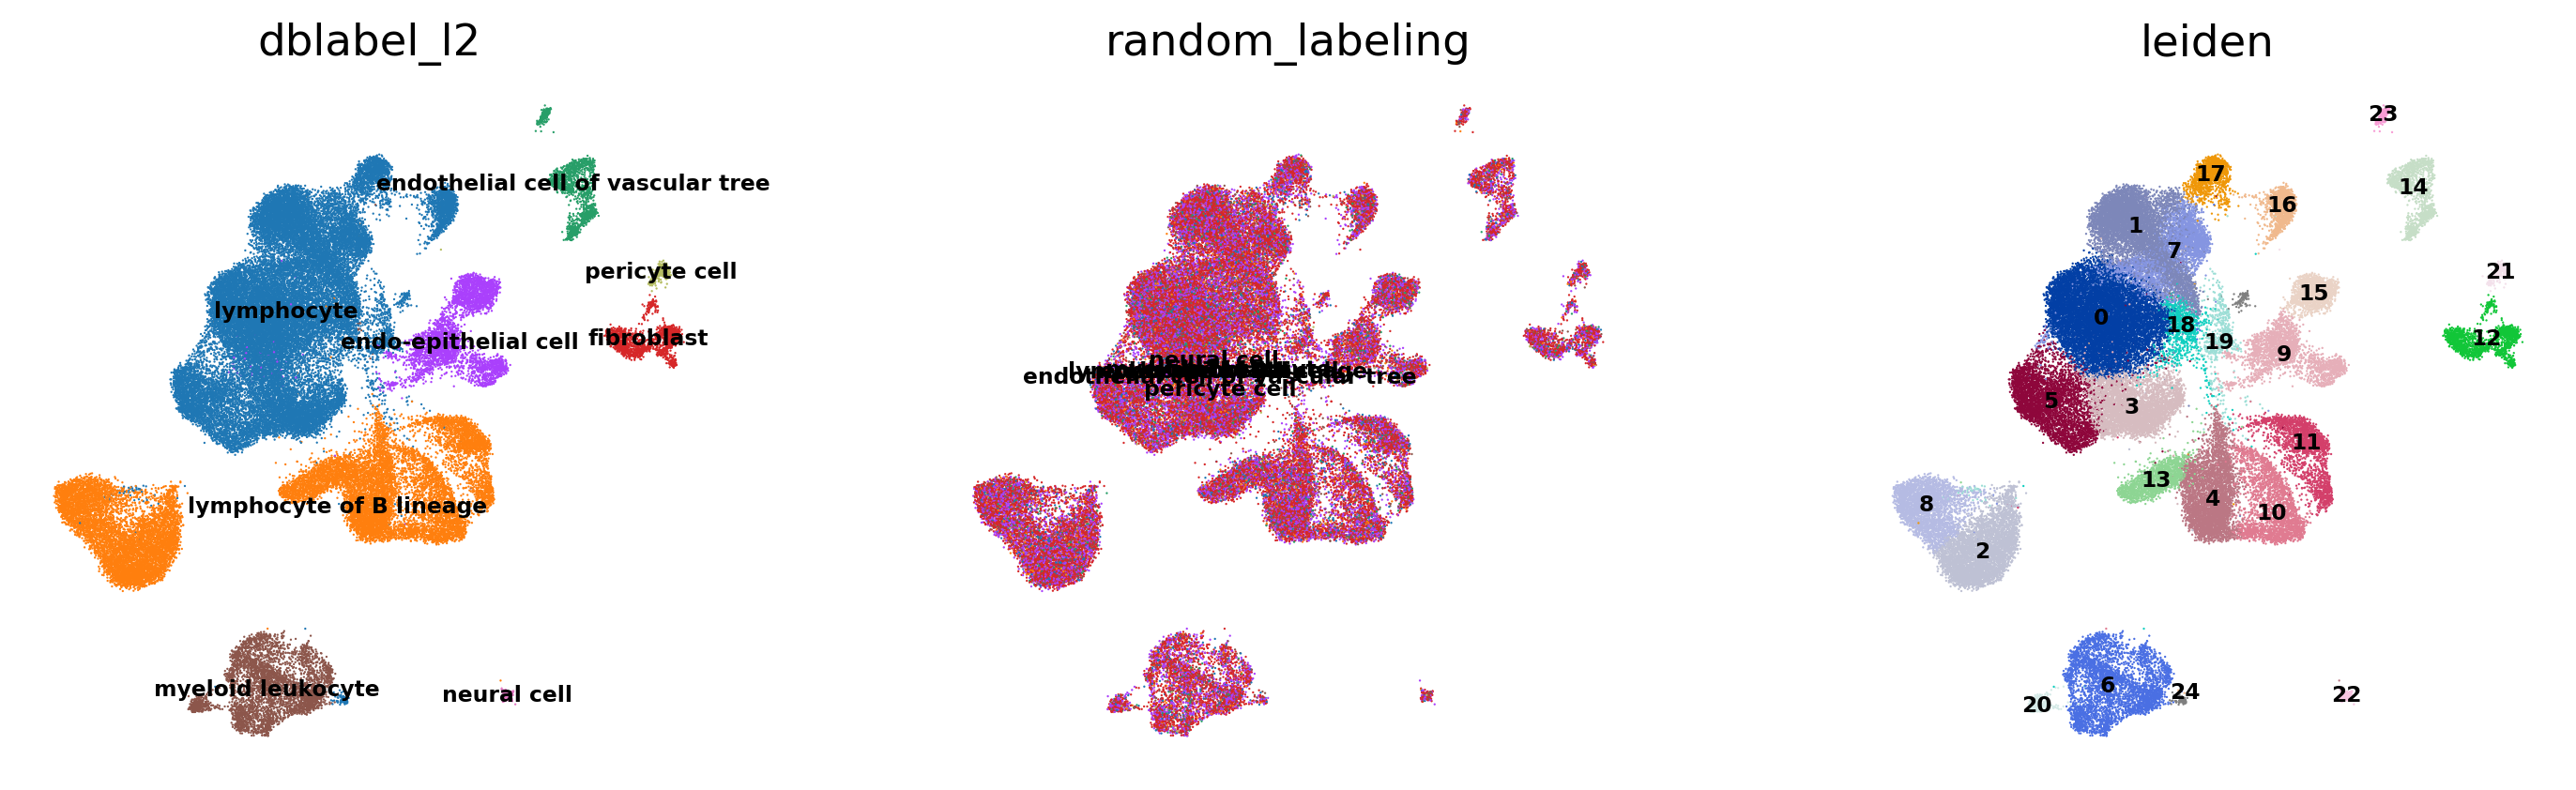

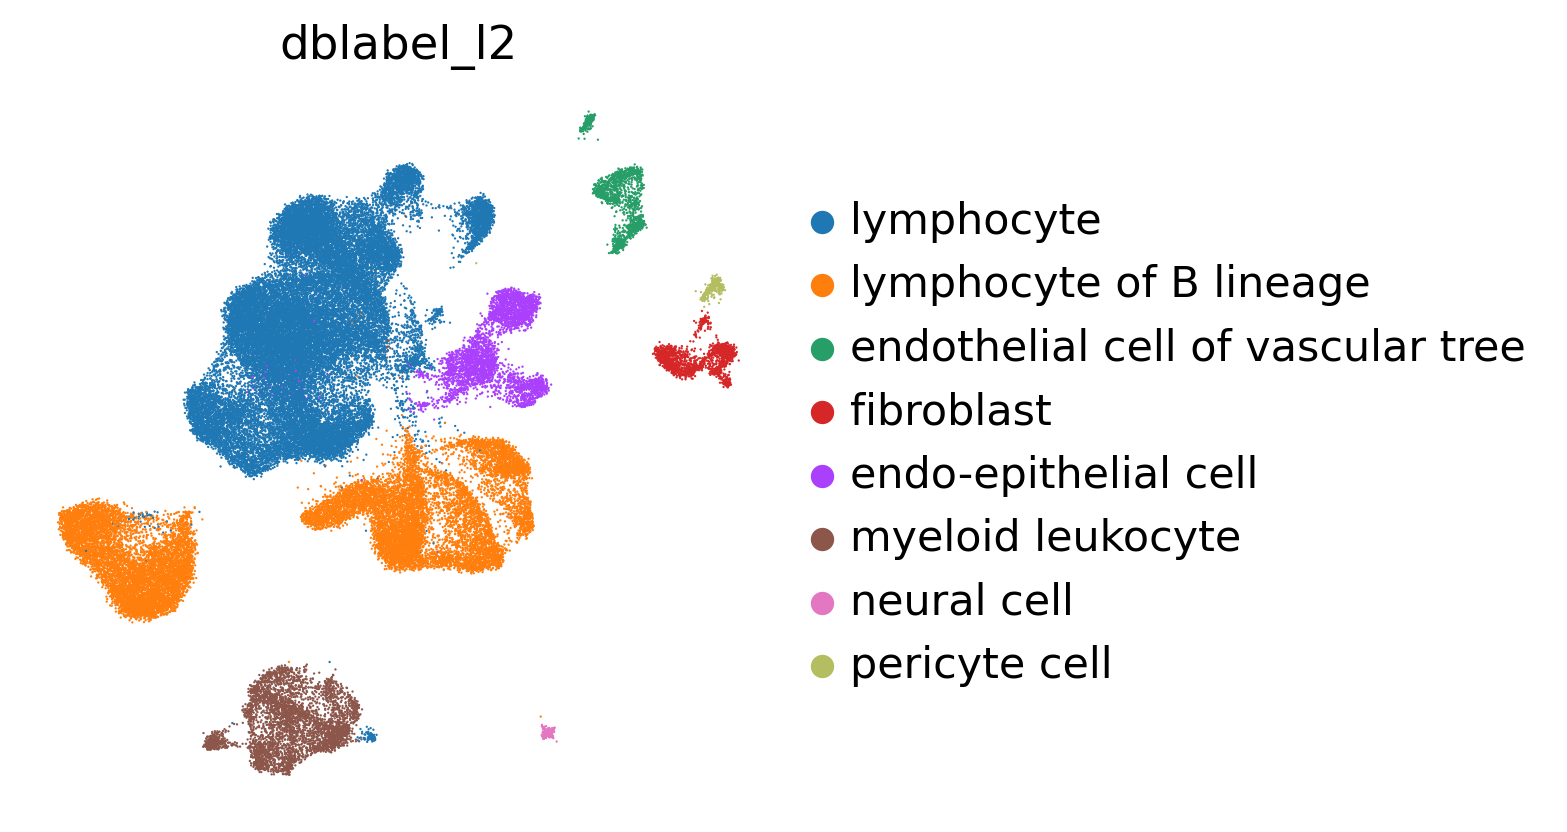

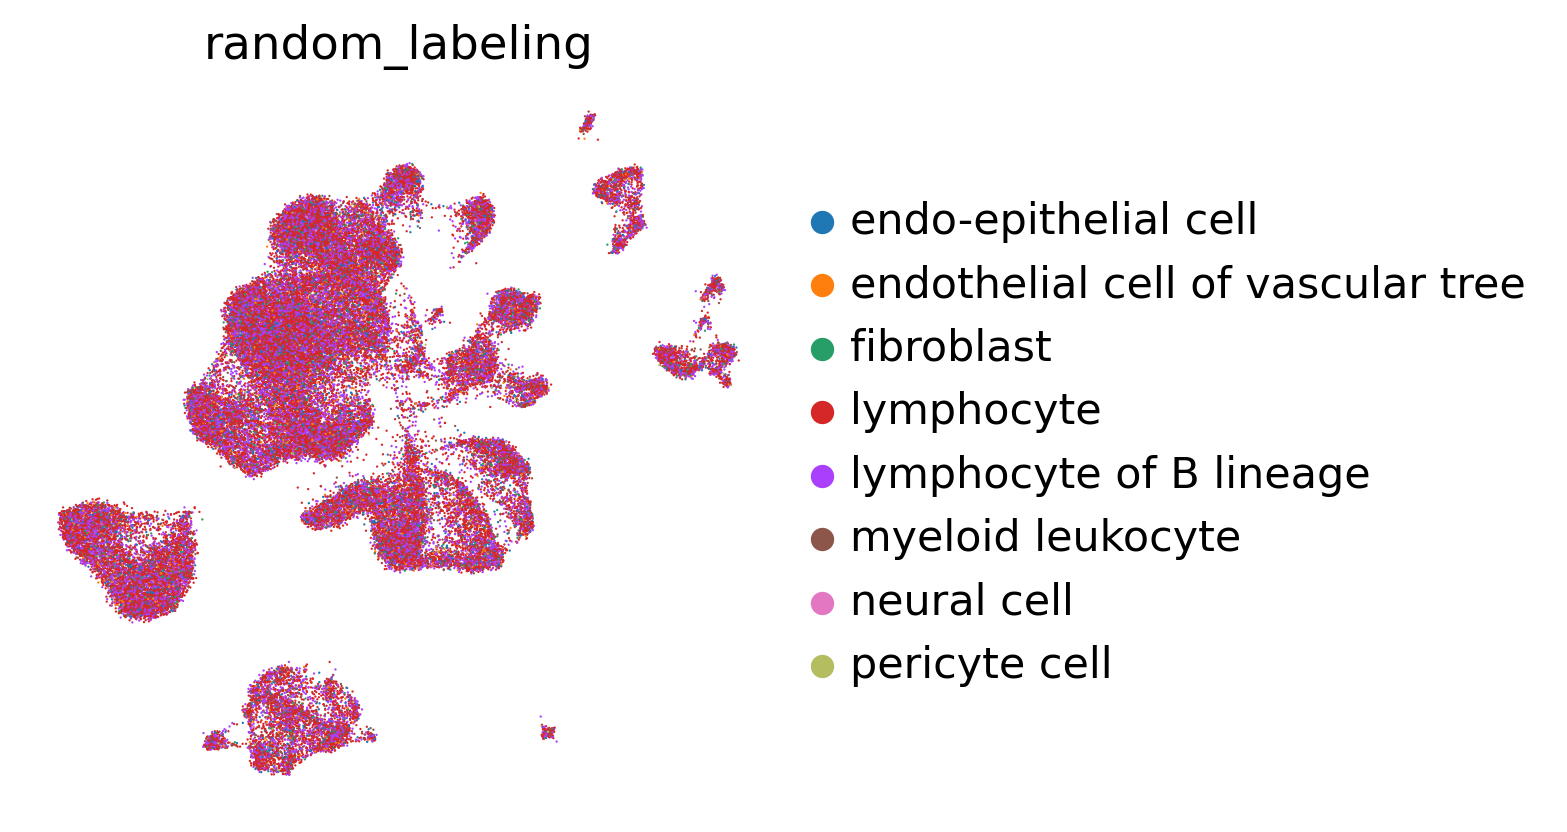

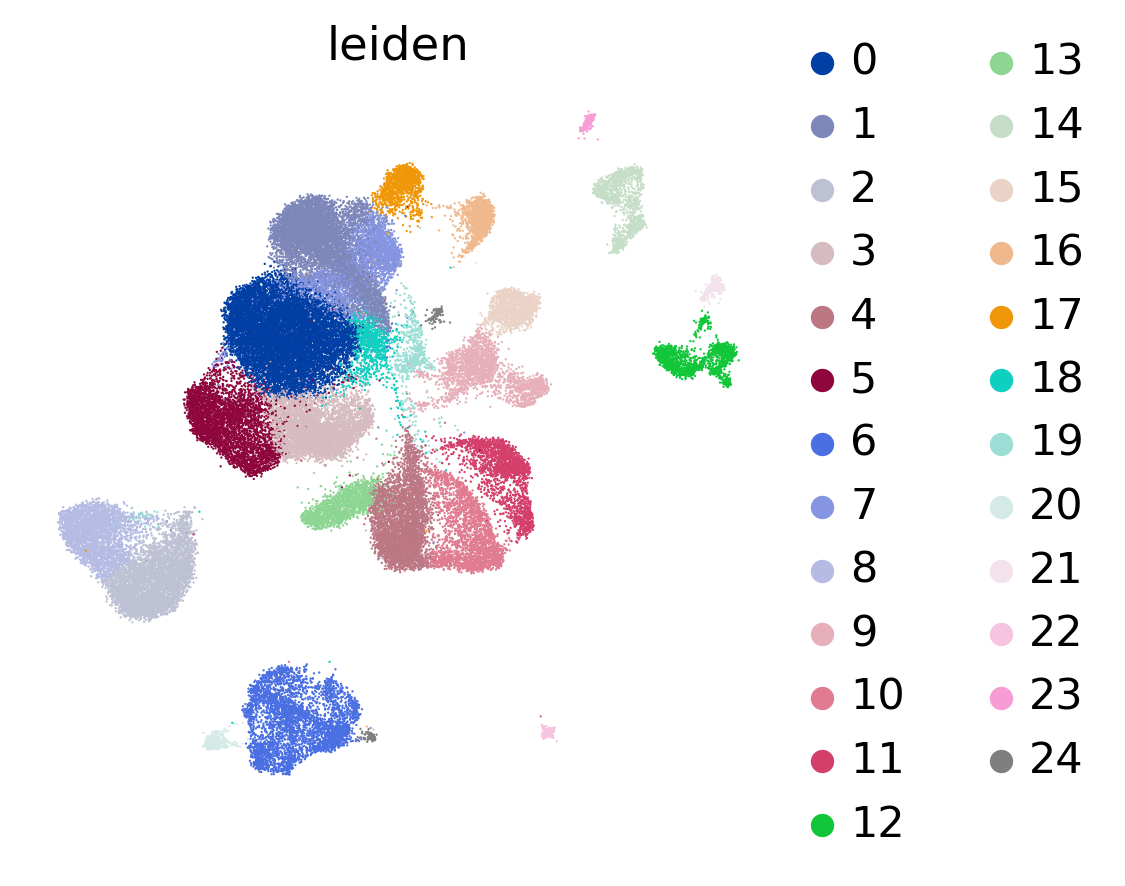

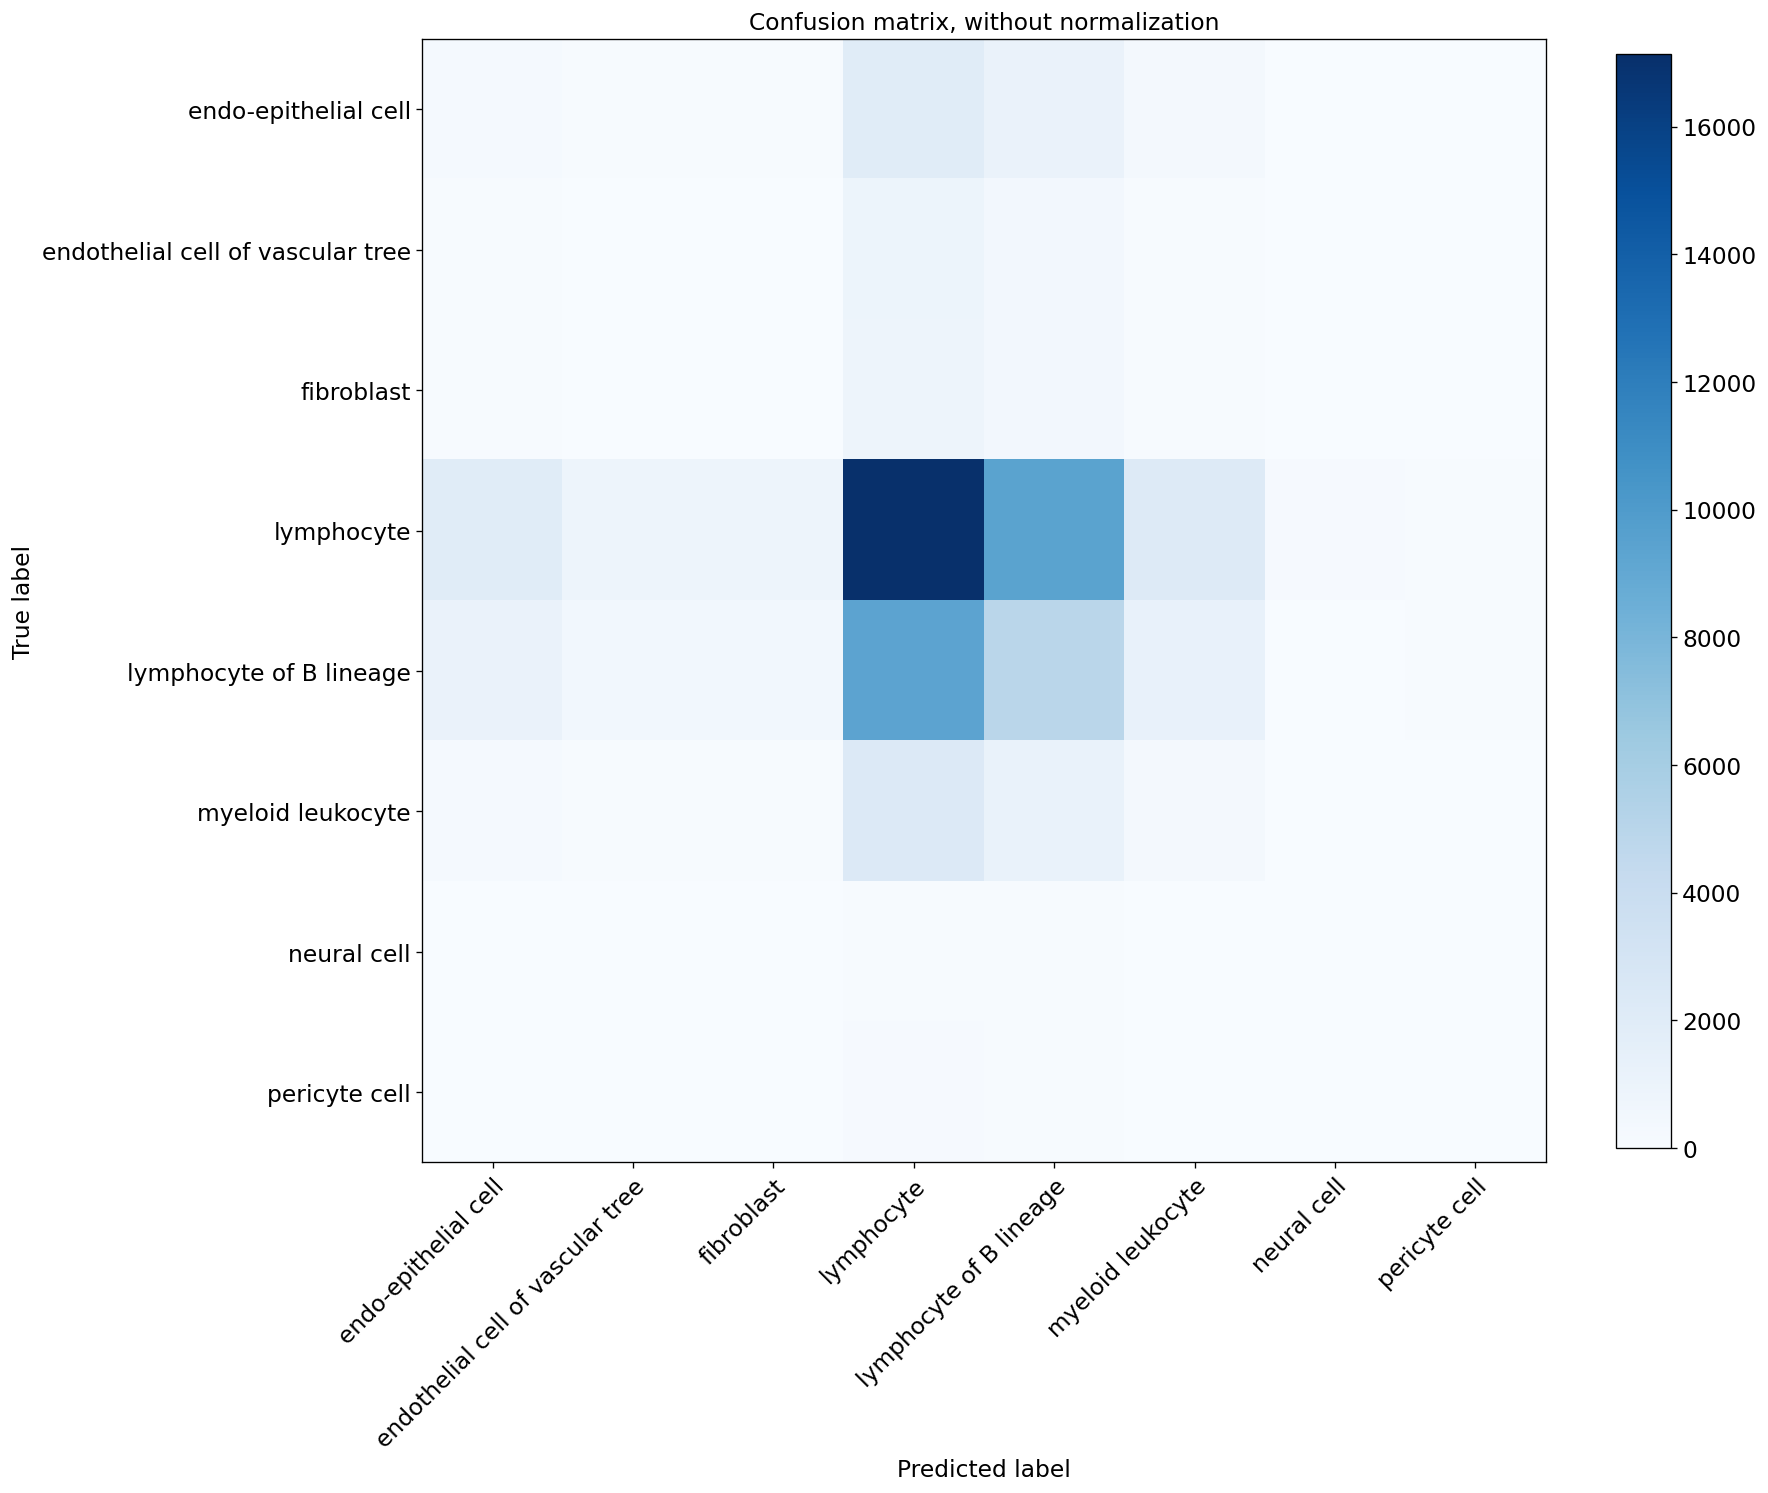

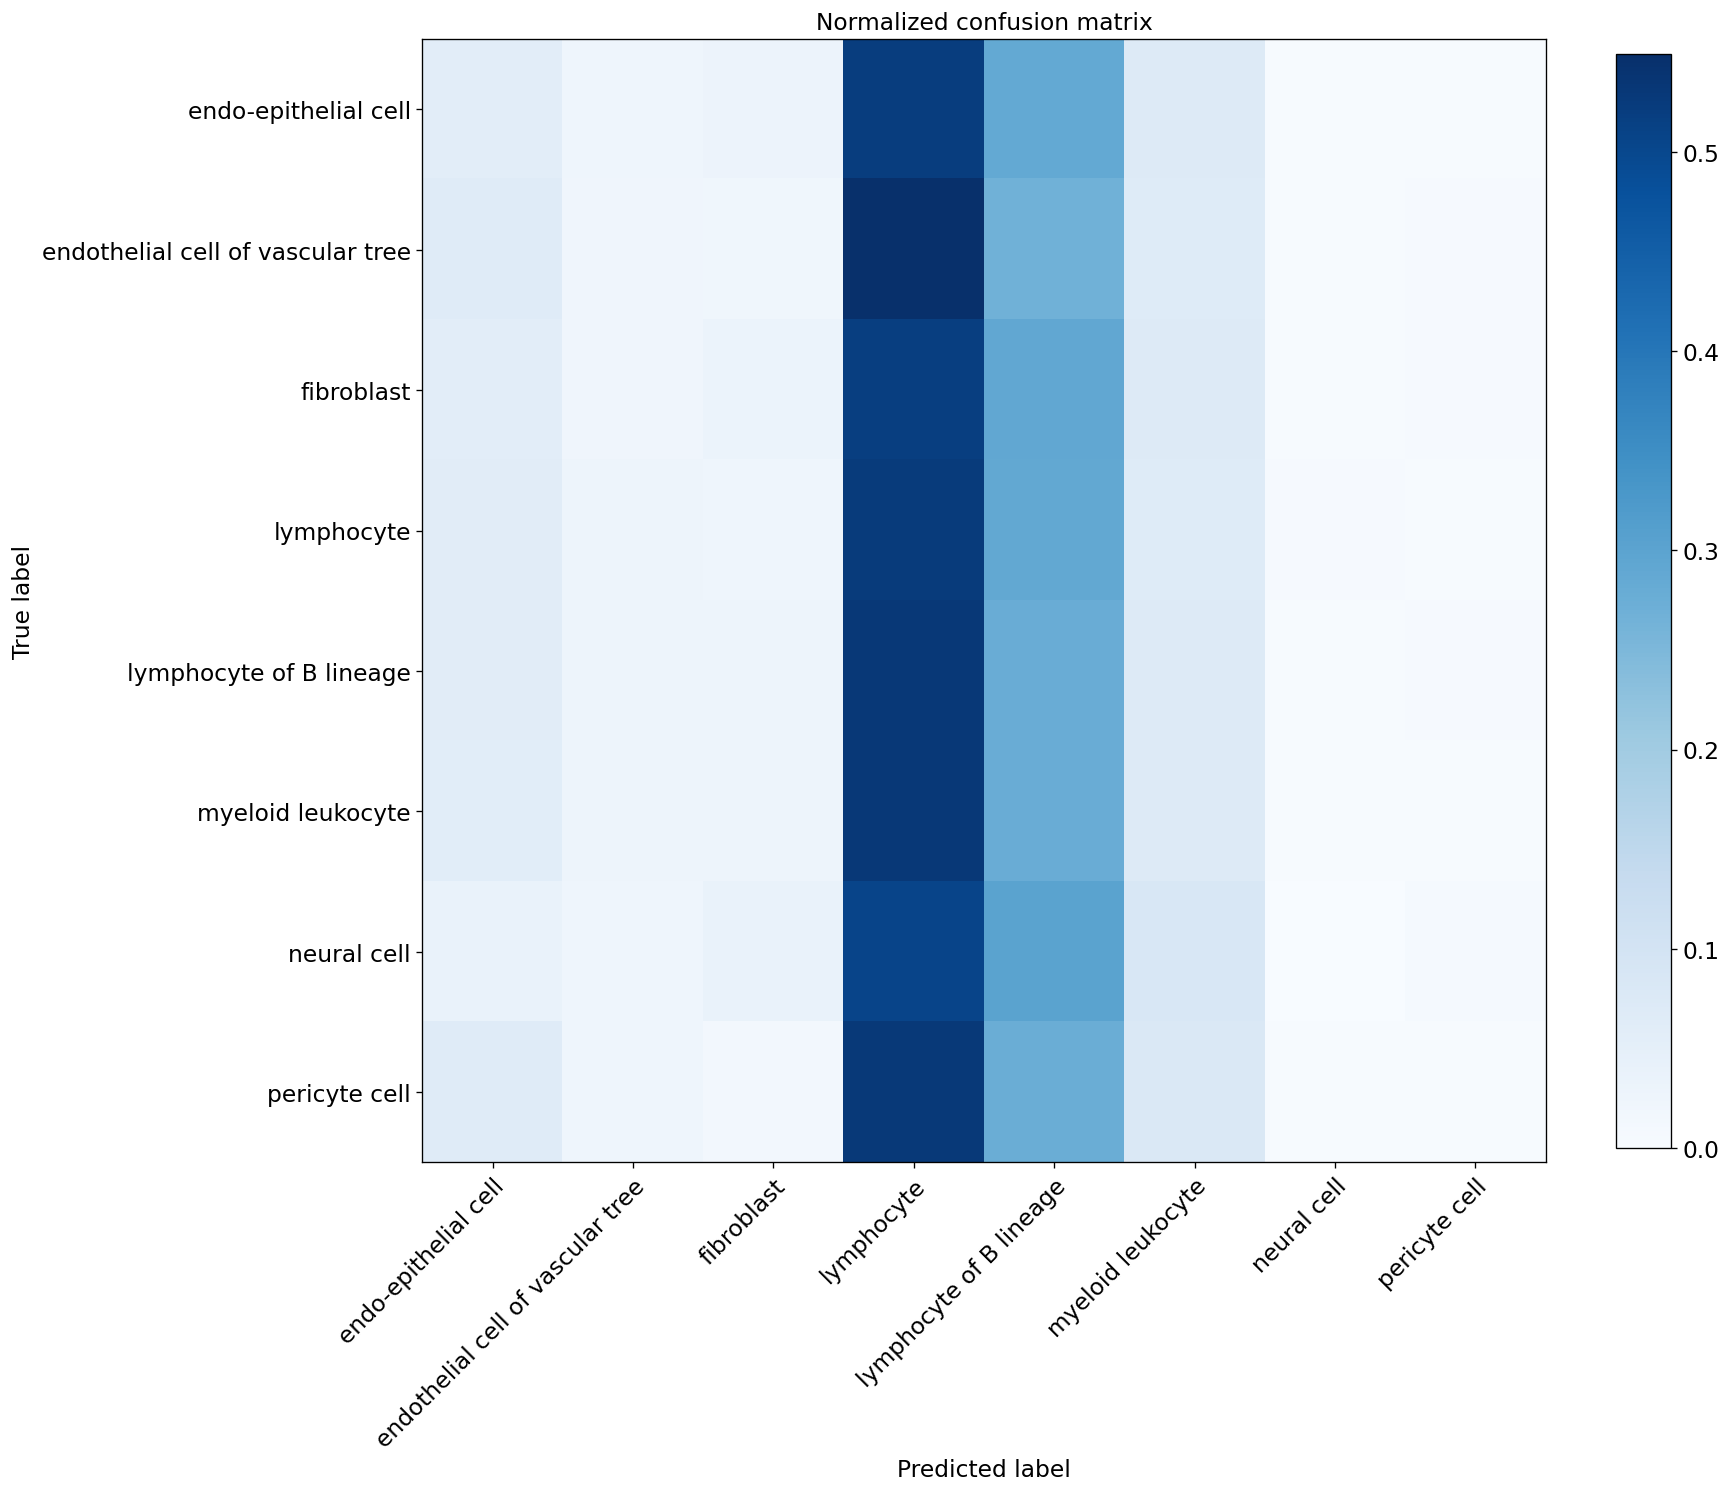

In [23]:
# Compare to random assignment
import random
random.seed(1)
adata_predicted.obs['random_labeling'] = list(adata_predicted.obs[celltype_test].sample(frac=1))

bc.tl.report(
    adata_pred=adata_predicted,
    celltype=celltype_test, 
    method="compare_to_random_" + method, 
    analysis_name=analysis_name,
    train_datasets = adata_trains,
    test_dataset = adata_orig,
    merge = merge,
    name_prediction="random_labeling",
    name_report="compare_to_random_auto_annot", 
    use_raw=use_raw,
    remove_nonshared=True, 
    clustering='leiden', 
    asymmetric_matrix=True, 
    delimiter='\t', 
    verbose=True)

In [24]:
from sinfo import sinfo
sinfo()

-----
anndata             0.7.5
besca               2.4+57.g5ad53b2
pandas              1.2.2
pkg_resources       NA
plotly              4.14.3
scanpy              1.6.1
sinfo               0.3.1
sklearn             0.24.1
-----
IPython             7.20.0
jupyter_client      6.1.11
jupyter_core        4.7.1
notebook            6.2.0
-----
Python 3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 21:08:20) [GCC 9.3.0]
Linux-3.10.0-693.11.6.el7.x86_64-x86_64-with-centos-7.4.1708-Core
24 logical CPU cores, x86_64
-----
Session information updated at 2021-07-18 08:04


### Convert to html

In [30]:
%%javascript

IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [31]:
nb_name = os.path.join(os.getcwd(), nb_name)

In [32]:
! jupyter nbconvert --to html {nb_name}

[NbConvertApp] Converting notebook /pstore/data/bioinfo/users/hatjek/devel/besca_publication_results/intestine/auto_annot/auto_annot_Martin2019_with_Smillie2019_dblabel_l2.ipynb to html
[NbConvertApp] Writing 10089166 bytes to /pstore/data/bioinfo/users/hatjek/devel/besca_publication_results/intestine/auto_annot/auto_annot_Martin2019_with_Smillie2019_dblabel_l2.html
